## *Imports*

Aqui, fazemos os *imports* das bibliotecas relevantes

In [82]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

## Estruturação

Nessa parte, carregamos o arquivo e separamos os dados importante, como os nós do grafo, suas arestas, as cores de cada linha e a posição, usando uma "planificação" das coordenadas geográficas de cada estação, fornecida no arquivo.

In [83]:
df = pd.read_csv('metro.csv')
df['cord'] = [(long, lat) for long, lat in zip(df['long'], df['lat'])]
cores = {'AMARELA' : '#FFFF00', 
         'AZUL' : '#0404B4',
         'CORAL' : '#FE642E',
         'DIAMANTE' : '#D8D8D8',
         'ESMERALDA' : '#ACFA58',
         'JADE' : '#088A08',
         'LILAS' : '#CC2EFA',
         'PRATA' : '#6E6E6E',
         'RUBI' : '#FF0000',
         'SAFIRA' : '#0404B4',
         'TURQUESA' : '#01DFD7',
         'VERDE' : '#01DF01',
         'VERMELHA' : '#FF0000'
        }
df['cor'] = [cores[linha] for linha in df['nome_lin']]
pos = dict(df[['estacao_upp', 'cord']].itertuples(index = False))

In [84]:
nodes = df['estacao_upp']
# Excluindo as estações "terminais"
edges = [caminho for caminho in df[['estacao_upp', 'link']].itertuples(index = False) if caminho[0] != caminho[1]]

Iniciando o grafo...

In [85]:
g = nx.Graph()
g.add_nodes_from(df['estacao_upp'], estacao = df['estacao_upp'])
g.add_edges_from(edges, color = df['cor'])

In [88]:
def melhor_caminho(estacao1, estacao2):
    if estacao1 not in g.nodes() or estacao2 not in g.nodes:
        print('Alguma estação é inválida!')
        return None
    return nx.shortest_path(g, estacao1, estacao2)

Interface (bem simples) com o usuário

In [90]:
while True:
    s1 = input('Digite a estação de saída')
    s2 = input('Digite a estação de entrada')
    if (caminho := melhor_caminho(s1, s2)):
        for estacao in caminho:
            trecho = (estacao + ' -> ' if estacao != s2 else estacao)
            print(trecho, end = '')
    sair = input("digite 's' para sair")
    if sair == 's':
        break

Digite a estação de saída'LUZ'
Digite a estação de entrada'JARAGUA'
Alguma estação é inválida!
digite 's' para sair
Digite a estação de saída'LUZ'
Digite a estação de entrada'JARDIM AURORA'
Alguma estação é inválida!
digite 's' para sair
Digite a estação de saídaLUZ
Digite a estação de entradaJARAGUA
LUZ -> BARRA FUNDA -> AGUA BRANCA -> LAPA RUBI -> PIQUERI -> PIRITUBA -> VILA CLARICE -> JARAGUAdigite 's' para sairs


## Visualização

Tentei implementar uma visualização. Mas parece que há algumas coisas esquisitas...

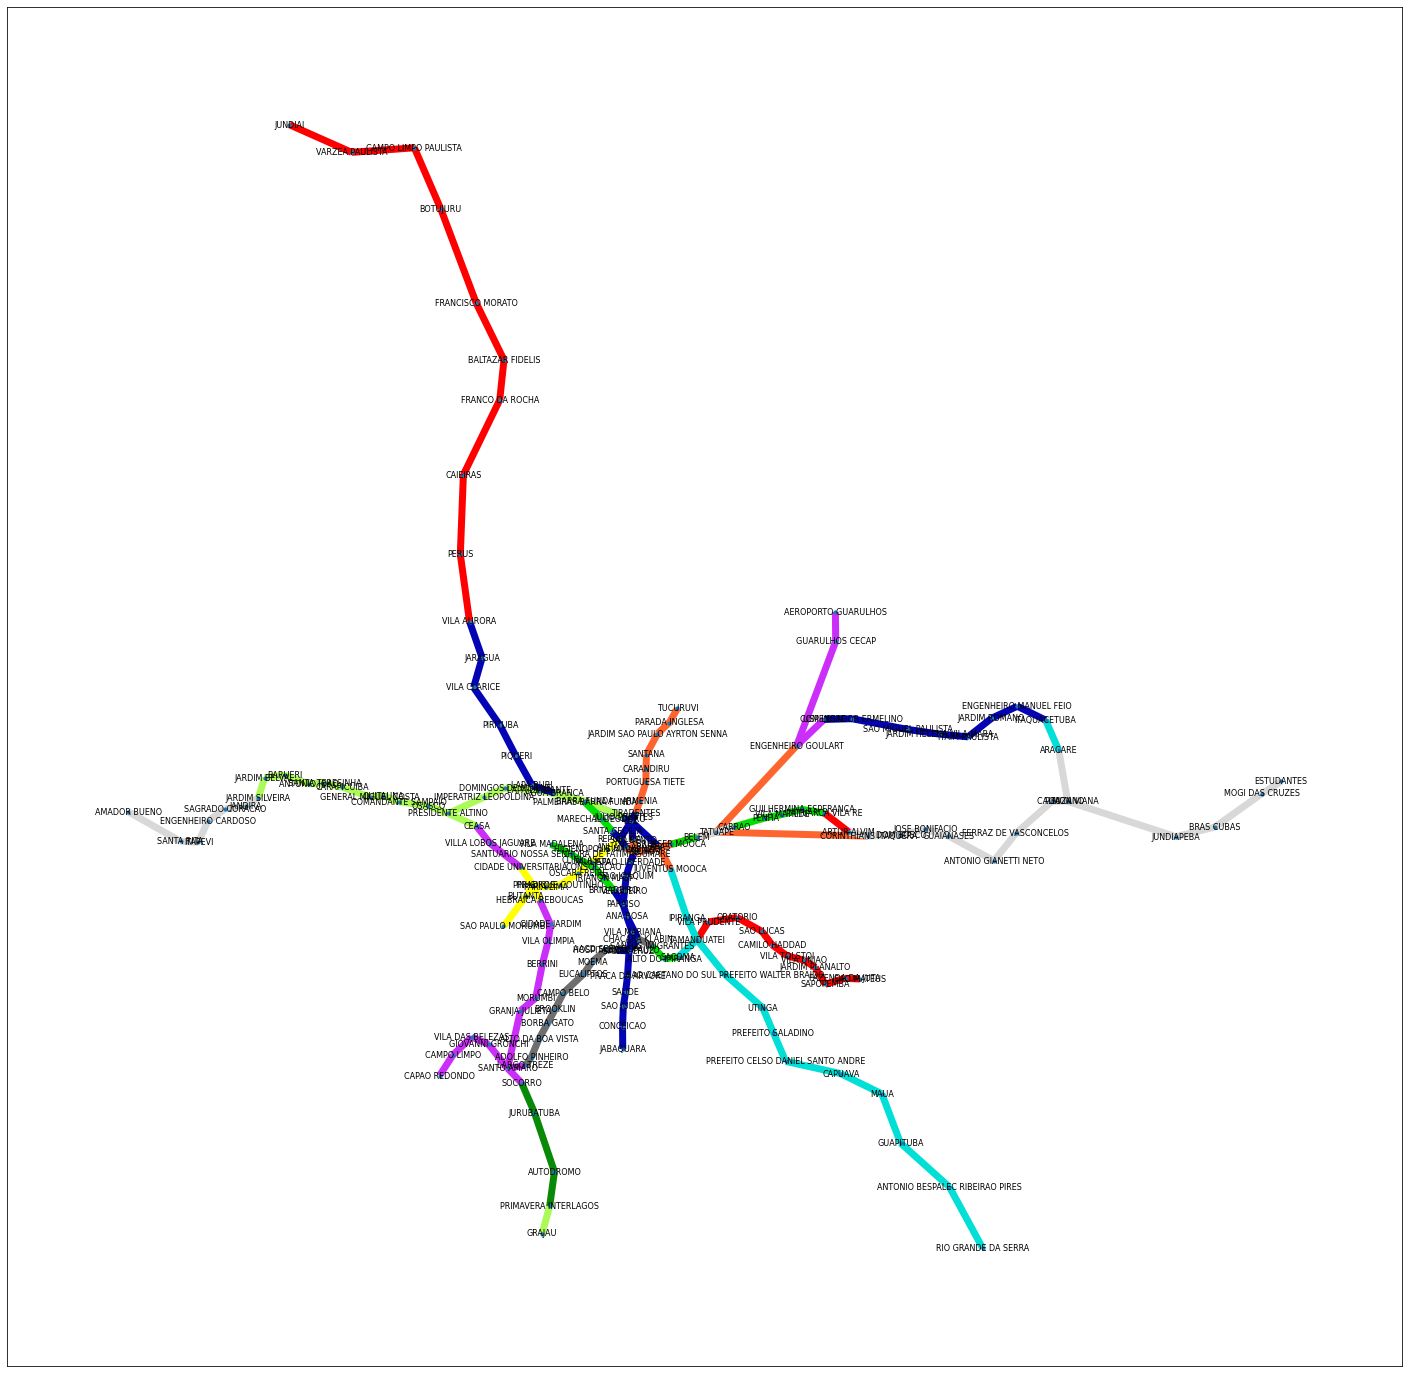

In [101]:
plt.figure(figsize = (25, 25))
nx.draw_networkx(g, edge_color = df['cor'], node_size = 10, font_size = 8, pos = pos, width = 7)